In [16]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Chapter 3
# Example 3.1: Histogram
Below is an example of how to use `matplotlib` to generate a histogram.

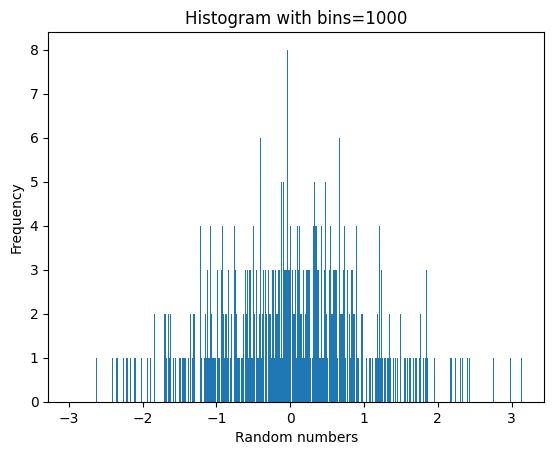

In [17]:
mu1 = 0  #Mean of the distribution
sigma1 = 1   #Standard deviation of the distribution

data = [np.random.normal(mu1, sigma1, 1000)]     # Drawing 10000 random samples from a normal distribution with mean mu and standard deviation sigma

plt.hist(data, bins = 1000) #Plotting the histogram
plt.xlabel('Random numbers')
plt.ylabel('Frequency')
plt.title('Histogram with bins=1000')
plt.show()

#Example 3.2: Histogram to Normalised Probability Distribution
Here, it is shown that as the number of total points and number of bins increases, the histogram approaches a probability distribution function (pdf).

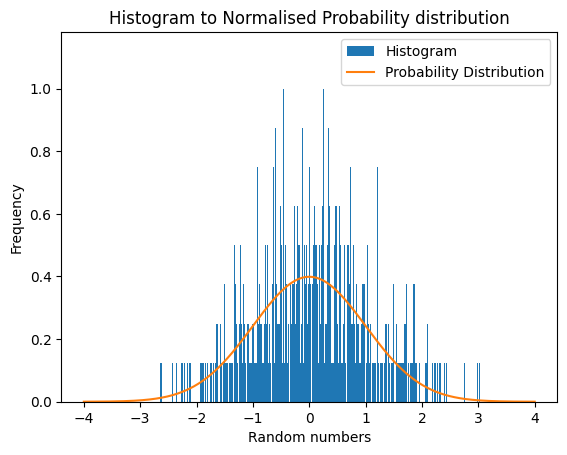

In [18]:
#Defining the normal distribution function

def pd(x, mu, sigma):
  return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))

r = np.linspace(-4,4,1000)

#Plot the histogram with pdf
data = [np.random.normal(mu1, sigma1, 1000)]
plt.hist(data, label='Histogram', bins=r, density = True)
plt.plot(r, pd(r,0,1), label='Probability Distribution')
plt.legend()
plt.title('Histogram to Normalised Probability distribution')
plt.xlabel('Random numbers')
plt.ylabel('Frequency')
plt.show()

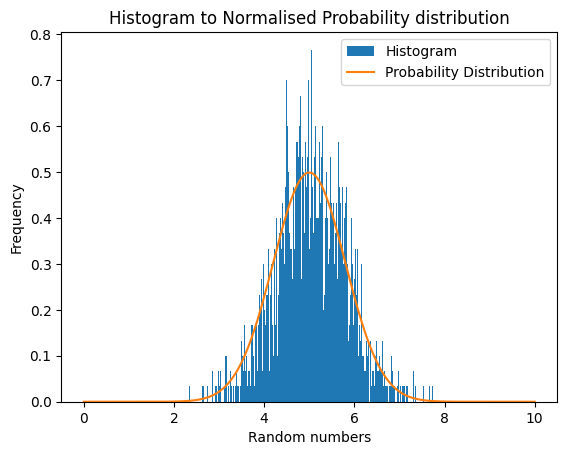

In [24]:
#Defining the normal distribution function

def pd(x, mu, sigma):
  return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))

r = np.linspace(0,10,1000)

#Plot the histogram with pdf
data = [np.random.normal(5, 0.8, 3000)]
plt.hist(data, label='Histogram', bins=r, density = True)
plt.plot(r, pd(r,5,0.8), label='Probability Distribution')
plt.legend()
plt.title('Histogram to Normalised Probability distribution')
plt.xlabel('Random numbers')
plt.ylabel('Frequency')
plt.show()

# Problem 5.1:
Now you can try to reproduce these results for different mean and standard deviation. I.e. in the above code, change the values of `sigma` and `mu`.



# Example 3.3: Finding Mean, median

In [28]:
x = np.array([5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,9,9,9,9])

mu = np.mean(x)
med = np.median(x)
print(sum, mu,med)

<built-in function sum> 6.84 7.0


# Example 3.4: Finding Mode

In [29]:
vals, counts = np.unique(x, return_counts=True)
mode_value = np.argwhere(counts == np.max(counts))
print(vals[mode_value].flatten().tolist())
print(np.max(counts))

[6, 7]
6


#Example 3.5: Visualization of the data

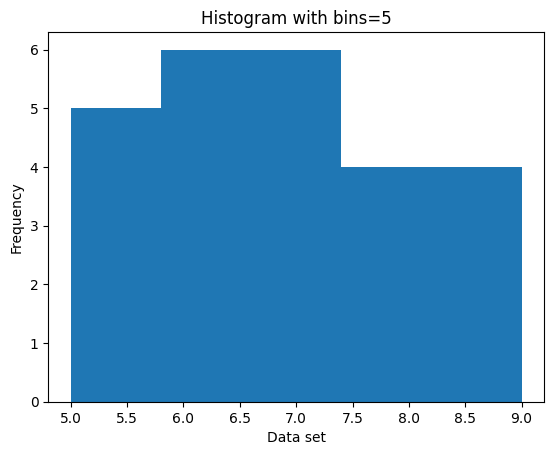

In [30]:
plt.hist(x, bins = 5)
plt.xlabel('Data set')
plt.ylabel('Frequency')
plt.title('Histogram with bins=5')
plt.show()

# Problem 5.2:
Find the mean, median and mode for the following data set and plot the histogram.

In [31]:
data = np.array([74, 88, 78, 90, 94, 90, 84, 90, 98, 80])

In [33]:
mn = np.mean(data)
mn

86.6

In [34]:
md = np.median(data)
md

89.0

In [35]:
vals, counts = np.unique(data, return_counts=True)
mode_value = np.argwhere(counts == np.max(counts))
print(vals[mode_value].flatten().tolist())
print(np.max(counts))

[90]
3


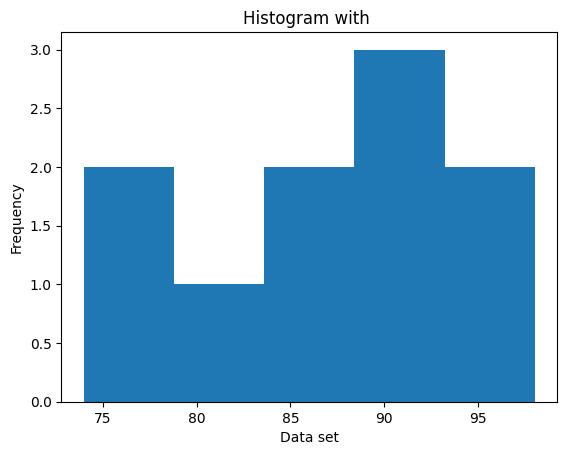

In [39]:
plt.hist(data, bins = 5)
plt.xlabel('Data set')
plt.ylabel('Frequency')
plt.title('Histogram with ')
plt.show()

# Example 3.6: Finding Range and Inter-quartile Range

In [41]:
Ran = np.max(x) - np.min(x)
print(Ran)

4


In [43]:
q3, q1 = np.percentile(x, [75,25]) # 75 for Q3 and 25 for Q1
iqr = q3 - q1
print(iqr)

2.0


# Problem 5.3:
Find the range and IQR for the following data set.

In [45]:
data = np.array([1, 4, 8, 11, 13, 17, 19, 19, 20, 23, 24, 24, 25, 28, 29, 31, 32])

Ran = np.max(data) - np.min(data)
print(Ran)

q3, q1 = np.percentile(data, [75,25]) # 75 for Q3 and 25 for Q1
iqr = q3 - q1
print(iqr)

31
12.0


# Example 3.7: Finding Standard Deviation and Variance

In [46]:
sigma = np.std(x)
var = sigma**2
print(sigma, var)

1.3469966592386189 1.8144


# Problem 5.4:
Find the standard deviation and variance of the data set provided in exercise 3.2.

In [48]:
data_1 = np.array([74, 88, 78, 90, 94, 90, 84, 90, 98, 80])
sigma = np.std(data_1)
var = sigma**2
print(sigma, var)

7.102112361825881 50.44


# Chapter 4
# Example 4.1: Linear Regression

In [50]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,5,4,5])

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

#Print the coefficients
print(estimate_coef(X,Y))

(2.2, 0.6)


#Example 4.2: Plotting the data and the linear regression line

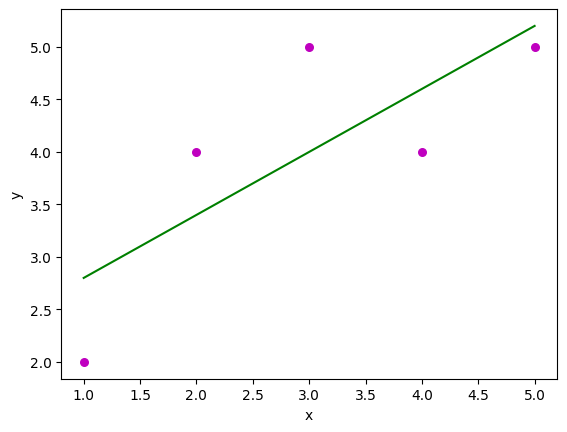

In [51]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

b = estimate_coef(X, Y)
plot_regression_line(X, Y, b)

# Example 4.3: Finding $R^2$ and standard error of estimate



In [60]:
def Rsquare(x,y,b):
  n = np.size(x)

  #Predicted line points
  y_pred = b[0] + b[1]*x

  #Mean of y
  m_y = np.mean(y)

  SSYy = np.sum(y_pred*y_pred) - n*m_y*m_y
  SSyy = np.sum(y*y) - n*m_y*m_y

  #calculating R-squared value
  Rsq = SSYy/SSyy

  return(Rsq)

def error(x,y,b):
  n = np.size(x)

  y_pred = b[0] + b[1]*x

  Sy = np.sum((y_pred - y)**2)

  #finding the standard error of estimate value
  err = np.sqrt(Sy/(n-2))

  return (err)


#Implementing for our dataset
b = estimate_coef(X, Y)
print(Rsquare(X,Y,b), error(X,Y,b))

0.6000000000000014 0.8944271909999157


# Problem 5.5:
Find the linear regression coefficients and plot the data points with the fitted line. Also find the $R^2$ value and standard error of estimate.

In [52]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [55]:
coeff = estimate_coef(x,y)
coeff

(1.2363636363636363, 1.1696969696969697)

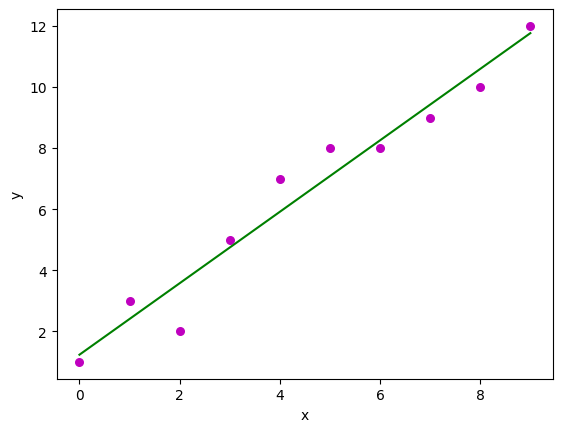

In [57]:
plot_regression_line(x, y, coeff)

In [61]:
Rsquare(x, y, coeff)

0.952538038613988

In [62]:
error(x, y, coeff)

0.8384690232980005